# **Letter classification algorithm**

## **Introduction**

This is the main program that makes different methods of number classification 

## **Machine Learning Algorithm**

This part contains the ML algorithm with different classifiers, firt there are some functions declarations that are used to manipulate the files in the folder.

In [1]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
def read_csv(filename):
    labels = []
    letters = []
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_NONNUMERIC) 
        for row in spamreader:
            labels.append(row[-1])
            letters.append(np.array(row[:-1]))
           
    return labels, letters      

In [3]:
print("Loading Training dataset...")
label_train, img_train = read_csv("emnist_train.csv")

print("Loading Testing dataset...")
label_test, img_test = read_csv("emnist_test.csv")

print("Finished loading!")

Loading Training dataset...
Loading Testing dataset...
Finished loading!


In [3]:
def test(clf):
    # Train on the first 50000 images:
    train_x = img_train[:90000]
    train_y = label_train[:90000]

    clf.fit(train_x, train_y)
    
    # Test on the next 5000 images:
    test_x = img_test[:5000]
    expected = [int(i) for i in label_test[0:len(img_test[:5000])]]

    predicted = clf.predict(test_x)

    print("The accuracy is: " + str(accuracy_score(expected, predicted)))

In [19]:
def DecisionTree():
    print("Decision Tree model")
    clf = DecisionTreeClassifier(random_state = 0, max_depth = 100)

    test(clf)
    
DecisionTree()

Decision Tree model
The accuracy is: 0.6818


# **Model evaluation**

## **Tuning parameter and Confusion Matrix**

This part contains...
This part contains the confusion matrix for each classification to better visualize the results


In [4]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# Model training and accuracy computation for different maximum_depth parameters
tree_depth = [i for i in range(2, 30)]
accs_train = []
accs_test  = []

train_x = img_train[:90000]
train_y = label_train[:90000]

test_x = img_test[:2500]
test_y = label_test[:2500]

for depth in tree_depth:
    clf = DecisionTreeClassifier(random_state = 0, max_depth = depth)
    clf.fit(train_x, train_y)
    accs_train.append(clf.score(train_x, train_y))
    accs_test.append(clf.score(test_x, test_y))
plt.figure(figsize=(16, 8))

print("Tree depth: " + str(tree_depth[np.argmax(accs_test)]))

# Draw accuracies as a function of the depth for both trainin and testing sets
plt.plot(tree_depth, accs_train, label = 'Train Accuracy')
plt.plot(tree_depth, accs_test,  label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.legend()
plt.xticks(tree_depth)
plt.show()  

In [ ]:
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'] 
plt.figure(figsize=(12,6))

Ypred_train = clf.predict(train_x)
Ypred_test = clf.predict(test_x)

'''
# Computation of confusion matrix on training set
cm = confusion_matrix(train_y, Ypred_train)
plt.subplot(121)
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix, Training Set')
'''

'''
# Computation of confusion matrix on testing set
cm = confusion_matrix(test_y, Ypred_test)
plt.subplot(121)
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix, Testing Set')
plt.show()
'''

# Computation of confusion matrix on testing set
cm = confusion_matrix(test_y, Ypred_test)
#plt.subplot(122)
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix, Testing Set 2')
plt.show()

## **K-Nearest Neighbours algorithm created**

This section is presented the algorithme developped.

In [5]:
import kk

In [6]:
%%time

from sklearn.metrics import accuracy_score

train_x = img_train[:1000]
train_y = label_train[:1000]

test_x = img_test[:500]
test_y = label_test[:500]

predictions = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, 7)

# evaluating accuracy
accuracy = accuracy_score(test_y, predictions) * 100
print('\nThe accuracy of OUR classifier is %d%%' % accuracy)



The accuracy of OUR classifier is 57%
CPU times: user 7.67 s, sys: 15.2 ms, total: 7.69 s
Wall time: 7.71 s


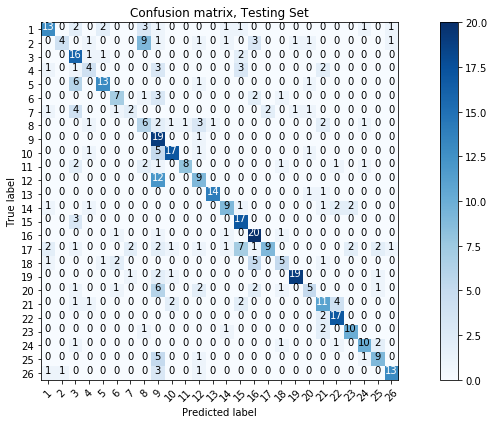

In [11]:
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26'] 
plt.figure(figsize=(12,6))

'''
# Computation of confusion matrix on training set
train_predictions = kk.kNearestNeighbor(train_x, train_y, train_x, train_y, 7)
cm = confusion_matrix(test_y, train_predictions)
plt.subplot(121)
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix, Training Set')
'''
# Computation of confusion matrix on testing set
predictions = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, 7)
cm = confusion_matrix(test_y, predictions)
#plt.subplot(122)
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix, Testing Set')

plt.show()

Optimal number for k: 1


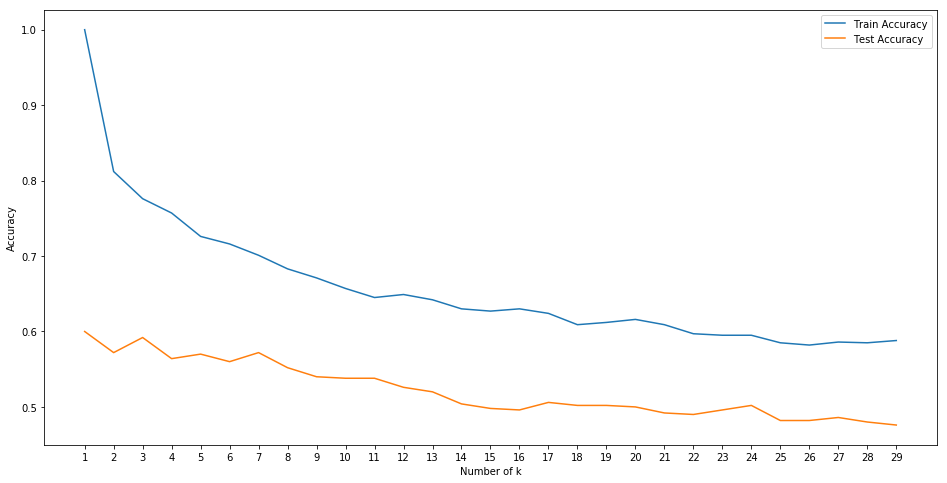

CPU times: user 11min 9s, sys: 328 ms, total: 11min 10s
Wall time: 11min 9s


In [12]:
%%time

# Model training and accuracy computation for different k values
k_values = [i for i in range(1, 30)]
accs_train = []
accs_test  = []

train_x = img_train[:1000]
train_y = label_train[:1000]

test_x = img_test[:500]
test_y = label_test[:500]

for k in k_values:

    predictions_train = []
    predictions_test = []

    predictions_train = kk.kNearestNeighbor(train_x, train_y, train_x, train_y, k)
    accs_train.append(accuracy_score(train_y, predictions_train))

    predictions_test = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, k)
    accs_test.append(accuracy_score(test_y, predictions_test))

plt.figure(figsize=(16, 8))

print("Optimal number for k: " + str(k_values[np.argmax(accs_test)]))

# Draw accuracies as a function of the depth for both trainin and testing sets
plt.plot(k_values, accs_train, label = 'Train Accuracy')
plt.plot(k_values, accs_test,  label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of k')
plt.legend()
plt.xticks(k_values)
plt.show()  